In [ ]:
#setup

In [7]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
#Linear SVM Classification

In [13]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("1e10"))
svm_clf.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
#train a LinearSVC on a linearly separable dataset

In [25]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [35]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="squared_hinge", C=C, dual=False, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=1000, tol=1e-3, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [0.30797441] [[1.04063467 0.92275725]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.117] [[0.77714169 0.72981762]]


In [ ]:
#Train an SVM Classifier on the MNIST Dataset

In [39]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [43]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8348666666666666

In [ ]:
#training svc

In [45]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
mnist = datasets.fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]

# Convert the target to integer
y = y.astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVM Classifier
svm_clf = SVC(kernel="rbf", gamma="scale", C=5)  # Using RBF kernel with default gamma
svm_clf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_clf.predict(X_test_scaled)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Classifier Accuracy: {accuracy * 100:.2f}%")

SVM Classifier Accuracy: 96.99%


In [ ]:
#Grid Search with Cross-Validation to Find Best Hyperparameters for SVM

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split


mnist = datasets.fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]
y = y.astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42, stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


param_grid_poly = {
    'C': [0.1, 10],   # Fewer values
    'degree': [2, 3],  # Focus on common degrees
    'coef0': [0.0, 0.5]  # Fewer values for coef0
}


svm_poly = SVC(kernel="poly")
grid_search_poly = GridSearchCV(svm_poly, param_grid_poly, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search_poly.fit(X_train_scaled, y_train)


print("Best hyperparameters for Polynomial Kernel:", grid_search_poly.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best hyperparameters for Polynomial Kernel: {'C': 10, 'coef0': 0.5, 'degree': 3}


In [67]:
from sklearn.metrics import classification_report, accuracy_score


best_poly_svc = grid_search_poly.best_estimator_


y_pred = best_poly_svc.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy with best hyperparameters:", test_accuracy)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test set accuracy with best hyperparameters: 0.9553015873015873

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      6213
           1       0.97      0.98      0.98      7089
           2       0.94      0.95      0.94      6291
           3       0.95      0.94      0.94      6427
           4       0.94      0.96      0.95      6142
           5       0.95      0.95      0.95      5682
           6       0.97      0.97      0.97      6188
           7       0.96      0.95      0.95      6564
           8       0.96      0.93      0.95      6142
           9       0.94      0.94      0.94      6262

    accuracy                           0.96     63000
   macro avg       0.96      0.95      0.95     63000
weighted avg       0.96      0.96      0.96     63000



In [ ]:
#Average Precision: 0.941
#Average Recall: 0.94
#Average F1-Score: 0.94

In [ ]:
#Grid Search for RBF Kernel (Optimize C and gamma)

In [55]:

param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.001, 0.0001]
}

svm_rbf = SVC(kernel="rbf")
grid_search_rbf = GridSearchCV(svm_rbf, param_grid_rbf, cv=5, scoring='accuracy', verbose=2)
grid_search_rbf.fit(X_train_scaled, y_train)


print("Best hyperparameters for RBF Kernel:", grid_search_rbf.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .................................C=0.1, gamma=scale; total time=   9.0s
[CV] END .................................C=0.1, gamma=scale; total time=   9.4s
[CV] END .................................C=0.1, gamma=scale; total time=  11.5s
[CV] END .................................C=0.1, gamma=scale; total time=   9.1s
[CV] END .................................C=0.1, gamma=scale; total time=   8.7s
[CV] END ..................................C=0.1, gamma=0.01; total time=  14.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=  14.4s
[CV] END ..................................C=0.1, gamma=0.01; total time=  14.8s
[CV] END ..................................C=0.1, gamma=0.01; total time=  14.8s
[CV] END ..................................C=0.1, gamma=0.01; total time=  15.1s
[CV] END .................................C=0.1, gamma=0.001; total time=   9.0s
[CV] END .................................C=0.1,

In [68]:
from sklearn.metrics import classification_report, accuracy_score


best_rbf_svc = grid_search_rbf.best_estimator_


y_pred_rbf = best_rbf_svc.predict(X_test_scaled)


test_accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("Test set accuracy with best hyperparameters (RBF Kernel):", test_accuracy_rbf)

print("\nClassification Report (RBF Kernel):")
print(classification_report(y_test, y_pred_rbf))

Test set accuracy with best hyperparameters (RBF Kernel): 0.9406190476190476

Classification Report (RBF Kernel):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6213
           1       0.97      0.98      0.97      7089
           2       0.92      0.94      0.93      6291
           3       0.93      0.92      0.93      6427
           4       0.94      0.95      0.94      6142
           5       0.94      0.92      0.93      5682
           6       0.95      0.95      0.95      6188
           7       0.89      0.95      0.92      6564
           8       0.96      0.90      0.93      6142
           9       0.94      0.92      0.93      6262

    accuracy                           0.94     63000
   macro avg       0.94      0.94      0.94     63000
weighted avg       0.94      0.94      0.94     63000



In [ ]:
#Compare SVM Performance with Different Kernels (Linear, Polynomial, and RBF)

In [56]:
l
svm_linear = SVC(kernel="linear", C=1)
svm_linear.fit(X_train_scaled, y_train)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_linear = svm_linear.predict(X_test_scaled)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
precision_linear = precision_score(y_test, y_pred_linear, average='weighted')
recall_linear = recall_score(y_test, y_pred_linear, average='weighted')
f1_linear = f1_score(y_test, y_pred_linear, average='weighted')

print(f"Linear Kernel - Accuracy: {accuracy_linear}, Precision: {precision_linear}, Recall: {recall_linear}, F1-Score: {f1_linear}")


Linear Kernel - Accuracy: 0.9100158730158731, Precision: 0.9100011127172667, Recall: 0.9100158730158731, F1-Score: 0.9096090777556681


In [57]:

svm_poly_best = SVC(kernel="poly", **grid_search_poly.best_params_)
svm_poly_best.fit(X_train_scaled, y_train)


y_pred_poly = svm_poly_best.predict(X_test_scaled)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
precision_poly = precision_score(y_test, y_pred_poly, average='weighted')
recall_poly = recall_score(y_test, y_pred_poly, average='weighted')
f1_poly = f1_score(y_test, y_pred_poly, average='weighted')

print(f"Polynomial Kernel - Accuracy: {accuracy_poly}, Precision: {precision_poly}, Recall: {recall_poly}, F1-Score: {f1_poly}")


Polynomial Kernel - Accuracy: 0.9553015873015873, Precision: 0.9553557141357655, Recall: 0.9553015873015873, F1-Score: 0.9552833321812754


In [58]:

svm_rbf_best = SVC(kernel="rbf", **grid_search_rbf.best_params_)
svm_rbf_best.fit(X_train_scaled, y_train)

y_pred_rbf = svm_rbf_best.predict(X_test_scaled)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf, average='weighted')
recall_rbf = recall_score(y_test, y_pred_rbf, average='weighted')
f1_rbf = f1_score(y_test, y_pred_rbf, average='weighted')

print(f"RBF Kernel - Accuracy: {accuracy_rbf}, Precision: {precision_rbf}, Recall: {recall_rbf}, F1-Score: {f1_rbf}")


RBF Kernel - Accuracy: 0.9406190476190476, Precision: 0.9411013955434887, Recall: 0.9406190476190476, F1-Score: 0.9406300515383952


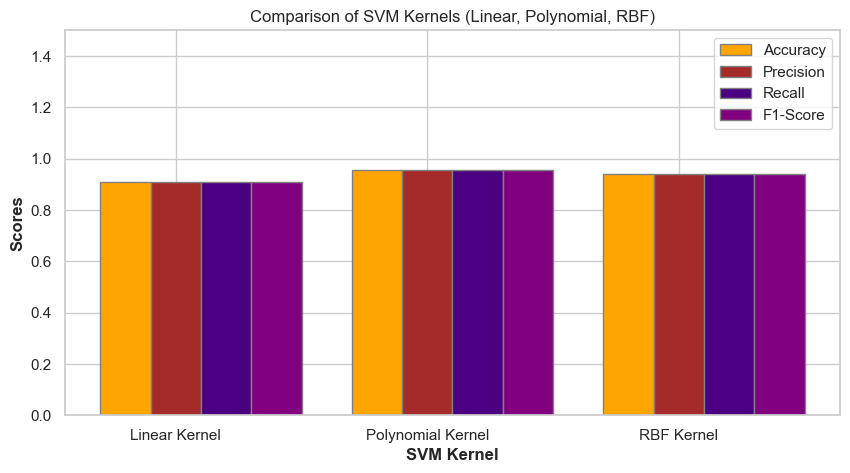

In [125]:
import matplotlib.pyplot as plt
import numpy as np


kernels = ['Linear Kernel', 'Polynomial Kernel', 'RBF Kernel']
accuracy = [0.9100158730158731, 0.9553015873015873, 0.9406190476190476]
precision = [0.9100011127172667, 0.9553557141357655, 0.9411013955434887]
recall = [0.9100158730158731, 0.9553015873015873, 0.9406190476190476]
f1_score = [0.9096090777556681, 0.9552833321812754, 0.9406300515383952]


bar_width = 0.2
r1 = np.arange(len(kernels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]


plt.figure(figsize=(10, 5))

plt.bar(r1, accuracy, color='orange', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision, color='brown', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recall, color='indigo', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1_score, color='purple', width=bar_width, edgecolor='grey', label='F1-Score')


plt.xlabel('SVM Kernel', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(kernels))], kernels)


plt.ylim(0, 1.5)
plt.legend()

plt.title('Comparison of SVM Kernels (Linear, Polynomial, RBF)')
plt.show()

In [ ]:
#classifiers from Assignment 4, i.e KNN, SGD, and Random Forest

In [ ]:
#knn classifier

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.decomposition import PCA
import numpy as np


pca = PCA(n_components=50)  
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)


knn_clf = KNeighborsClassifier()


param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance']  
}


grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy', verbose=3, n_jobs=-1)

grid_search.fit(X_train_reduced, y_train)


print("Best parameters found by Grid Search:", grid_search.best_params_)


best_knn_clf = grid_search.best_estimator_
best_knn_clf.fit(X_train_reduced, y_train)


y_knn_pred = best_knn_clf.predict(X_test_reduced)


accuracy = accuracy_score(y_test, y_knn_pred)
print("Test set accuracy with best hyperparameters:", accuracy)


precision = precision_score(y_test, y_knn_pred, average='weighted')  # 'weighted' for multi-class classification
recall = recall_score(y_test, y_knn_pred, average='weighted')
f1 = f1_score(y_test, y_knn_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


print("\nClassification report:\n", classification_report(y_test, y_knn_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found by Grid Search: {'n_neighbors': 3, 'weights': 'distance'}
Test set accuracy with best hyperparameters: 0.9535396825396826
Precision: 0.9537501162374058
Recall: 0.9535396825396826
F1-score: 0.9534710071959649

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      6213
           1       0.95      0.99      0.97      7089
           2       0.97      0.95      0.96      6291
           3       0.95      0.94      0.94      6427
           4       0.96      0.94      0.95      6142
           5       0.95      0.94      0.94      5682
           6       0.96      0.99      0.97      6188
           7       0.95      0.96      0.95      6564
           8       0.96      0.92      0.94      6142
           9       0.91      0.94      0.92      6262

    accuracy                           0.95     63000
   macro avg       0.95      0.95 

In [ ]:
#knn classifier
#Average Precision: 0.954
#Average Recall: 0.955
#Average F1-Score: 0.952

In [ ]:
#random forest classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2],  
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', verbose=1, n_jobs=4)
grid_search_rf.fit(X_train, y_train)
print("Best parameters:", grid_search_rf.best_params_)
y_pred = grid_search_rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy: 0.9511904761904761

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6213
           1       0.97      0.98      0.98      7089
           2       0.94      0.95      0.94      6291
           3       0.94      0.93      0.94      6427
           4       0.95      0.96      0.95      6142
           5       0.95      0.94      0.94      5682
           6       0.96      0.97      0.97      6188
           7       0.96      0.95      0.95      6564
           8       0.94      0.92      0.93      6142
           9       0.93      0.93      0.93      6262

    accuracy                           0.95     63000
   macro avg       0.95      0.95      0.95     63000
weighted avg       0.95      0.95      0.95     63

In [ ]:
#Randomforest regressor
#Average Precision: 0.95
#Average Recall: 0.951
#Average F1-Score: 0.95

In [ ]:
#sgd classifier

In [66]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('sgd', SGDClassifier(random_state=42, early_stopping=True))  # SGD Classifier
])


param_grid = {
    'sgd__loss': ['hinge', 'log_loss'],  # Hinge for linear SVM, log_loss for logistic regression
    'sgd__alpha': [0.0001, 0.001],  # Regularization strength
    'sgd__learning_rate': ['optimal', 'constant'],  # Learning rate schedule
    'sgd__eta0': [0.01, 0.1],  # Initial learning rate
    'sgd__penalty': ['elasticnet'],  # Type of regularization
    'sgd__max_iter': [1000]  # Number of iterations
}

grid_search_sgd = GridSearchCV(
    pipeline, param_grid, 
    cv=5, scoring='accuracy', verbose=1, n_jobs=-1  # Use all cores for faster search
)

grid_search_sgd.fit(X_train, y_train)

print("Best parameters found by Grid Search:", grid_search_sgd.best_params_)

best_sgd_clf = grid_search_sgd.best_estimator_
y_sgd_pred = best_sgd_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_sgd_pred)
print("Test set accuracy with best hyperparameters:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_sgd_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found by Grid Search: {'sgd__alpha': 0.001, 'sgd__eta0': 0.01, 'sgd__learning_rate': 'optimal', 'sgd__loss': 'hinge', 'sgd__max_iter': 1000, 'sgd__penalty': 'elasticnet'}
Test set accuracy with best hyperparameters: 0.895

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6213
           1       0.92      0.96      0.94      7089
           2       0.91      0.87      0.89      6291
           3       0.88      0.86      0.87      6427
           4       0.91      0.91      0.91      6142
           5       0.85      0.84      0.84      5682
           6       0.91      0.94      0.92      6188
           7       0.91      0.92      0.91      6564
           8       0.88      0.80      0.83      6142
           9       0.86      0.88      0.87      6262

    accuracy                           0.90     63000
   macro avg       0.89    

In [ ]:
#sgd classifier
#Average Precision: 0.895
#Average Recall: 0.894
#Average F1-Score: 0.892

In [ ]:
#Comparing the SVM classifier’s performance(ie: best one {svm with Polynomial kernel}) with the classifiers from Assignment 4,
#i.e KNN, SGD, and Random Forest.(classifications-accuracy, precision, recall)

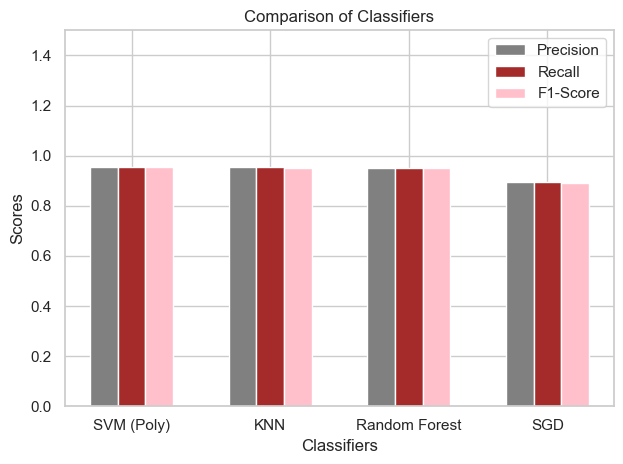

In [117]:
import matplotlib.pyplot as plt
import numpy as np

classifiers = ['SVM (Poly)', 'KNN', 'Random Forest', 'SGD']
precision = [0.9553557141357655, 0.954, 0.95, 0.895]
recall = [0.9553015873015873, 0.955, 0.951, 0.894]
f1_score = [0.9552833321812754, 0.952, 0.95, 0.892]

bar_width = 0.2
x = np.arange(len(classifiers))

plt.bar(x - bar_width, precision, width=bar_width, label='Precision', color='gray')
plt.bar(x, recall, width=bar_width, label='Recall', color='brown')
plt.bar(x + bar_width, f1_score, width=bar_width, label='F1-Score', color='pink')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Comparison of Classifiers')
plt.xticks(x, classifiers)
plt.ylim(0, 1.5)  # Set the limit of y-axis to 1
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
